# Transition Zone Analysis Tool 

In [1]:
#--Import Python Libraries
#get_ipython().magic('matplotlib notebook')
%matplotlib inline  
import pandas as pd
import numpy as np
from DataGrabber import *

In [2]:
#--Enter State Code
state = 'md'

#---------RUN----------#
gage_list1 = GotoUSGS(state)
gage_list2 = GotoNOAA()
print("\nCLICK HERE FOR USGS GAGES: \n", gage_list1)
print("\nCLICK HERE FOR NOAA GAGES: \n", gage_list2)


CLICK HERE FOR USGS GAGES: 
 https://waterdata.usgs.gov/nwis/uv?referred_module=sw&state_cd=md&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&format=station_list

CLICK HERE FOR NOAA GAGES: 
 https://tidesandcurrents.noaa.gov/stations.html?type=Water+Levels


In [3]:
LittleFalls = '01646500'    # https://waterdata.usgs.gov/nwis/inventory/?site_no=01646500&agency_cd=USGS
Anacostia_West = '01651000' # https://waterdata.usgs.gov/nwis/inventory/?site_no=01651000&agency_cd=USGS
Anacostia_East= '01649500' # https://waterdata.usgs.gov/nwis/inventory/?site_no=01649500&agency_cd=USGS
Tides_Only = Tidal  ='8594900'

df1_name = 'LittleFalls'
df2_name = 'Anacostia_West'
df3_name = 'Anacostia_East'
df4_name = 'Tidal'
df5_name = 'Tides_Only'

# ---------------------------------------------------------------------------------------------------------------

## Potomac River at Little Falls, df1_name = 'LittleFalls'


# ---------------------------------------------------------------------------------------------------------------

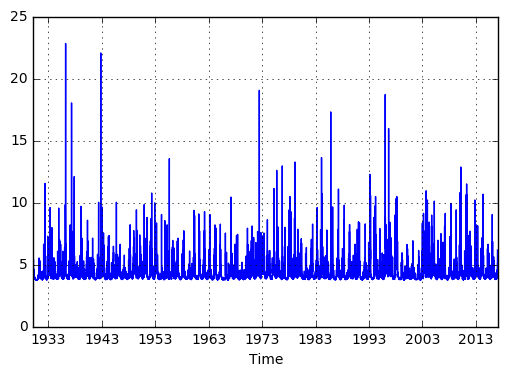

In [4]:
url = GetURL(eval(df1_name))### Riverine Gage #1 Potomac River at Little Falls

#--Read in Daily data, convert flow to stage
df1 = pd.read_csv(url, skiprows=29, sep='\t')
df1.drop(0, axis=0, inplace=True)
df1.rename(columns = {'68478_00060_00003':'Flow', '68478_00060_00003_cd':'Qual'}, inplace=True)
df1['Flow'] = pd.to_numeric(df1['Flow'])
df1['datetime'] = pd.to_datetime(df1['datetime'], format= '%Y-%m-%d')
polynomial = Q_to_Stage(eval(df1_name))
df1['Stage'] = polynomial(df1['Flow'])
#df1.head(5)

x = df1['datetime']
y = df1['Stage']

fig, ax1 = plt.subplots()
ax1.plot(x, y, 'b')
ax1.set_ylabel('', color='b')
ax1.set_xlabel('Time')
ax1.grid()

### Identify Precipitation Events

In [5]:
#--Identify Peaks
df1_peaks = df1.query('Stage > 12').copy()
df1_peaks.head()

#--manually eliminate neighbors
print(len(df1_peaks))
for i in df1_peaks.index:
    if i + 1 in df1_peaks.index:
        df1_peaks.drop(i+1, axis=0, inplace=True)
print(len(df1_peaks))

df1_idx = df1_peaks.index

26
15


# ---------------------------------------------------------------------------------------------------------------

### Anacostia West,  df2_name = 'Anacostia_West'

# ---------------------------------------------------------------------------------------------------------------

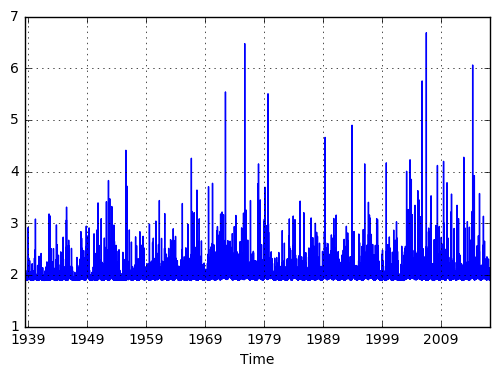

In [6]:
url = GetURL(eval(df2_name))### Riverine Gage #2 Anacostia River, West Branch

#--Read in Daily data, convert flow to stage
df2 = pd.read_csv(url, skiprows=28, sep='\t')
df2.drop(0, axis=0, inplace=True)
df2.rename(columns = {'68647_00060_00003':'Flow', '	68647_00060_00003_cd':'Qual'}, inplace=True)
df2['Flow'] = pd.to_numeric(df2['Flow'])
df2['datetime'] = pd.to_datetime(df2['datetime'], format= '%Y-%m-%d')
polynomial = Q_to_Stage(eval(df2_name))
df2['Stage'] = polynomial(df2['Flow'])


x = df2['datetime']
y = df2['Stage']

fig, ax1 = plt.subplots()
ax1.plot(x, y, 'b')
ax1.set_ylabel('', color='b')
ax1.set_xlabel('Time')
ax1.grid()

In [7]:
#--Identify Peaks
df2_peaks = df2.query('Stage > 4.5').copy()
df2_peaks.head()

#--manually eliminate neighbors
print(len(df2_peaks))
for i in df2_peaks.index:
    if i + 1 in df2_peaks.index:
        df2_peaks.drop(i+1, axis=0, inplace=True)
print(len(df2_peaks))

df2_idx = df2_peaks.index

9
8


# ---------------------------------------------------------------------------------------------------------------

### Anacostia East,  df3_name = 'Anacostia_East'

# ---------------------------------------------------------------------------------------------------------------

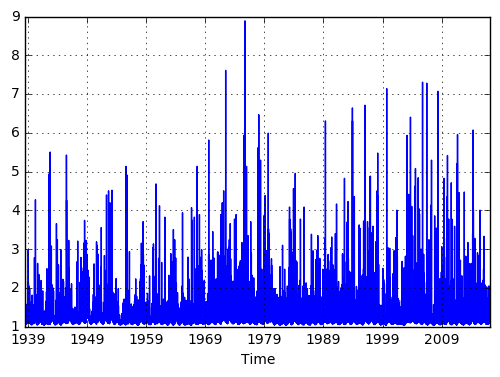

In [8]:
url = GetURL(eval(df3_name))### Riverine Gage #3 Anacostia River, West Branch

#--Read in Daily data, convert flow to stage
df3 = pd.read_csv(url, skiprows=28, sep='\t')
df3.drop(0, axis=0, inplace=True)
df3.rename(columns = {'68589_00060_00003':'Flow', '68589_00060_00003_cd':'Qual'}, inplace=True)
df3.head()
df3['Flow'] = pd.to_numeric(df3['Flow'], errors='coerce')
df3['datetime'] = pd.to_datetime(df3['datetime'], format= '%Y-%m-%d')
polynomial = Q_to_Stage(eval(df3_name))
df3['Stage'] = polynomial(df3['Flow'])


x = df3['datetime']
y = df3['Stage']

fig, ax1 = plt.subplots()
ax1.plot(x, y, 'b')
ax1.set_ylabel('', color='b')
ax1.set_xlabel('Time')
ax1.grid()

In [9]:
#--Identify Peaks
df3_peaks = df3.query('Stage > 6').copy()
df3_peaks.head()

#--manually eliminate neighbors
print(len(df3_peaks))
for i in df3_peaks.index:
    if i + 1 in df3_peaks.index:
        df3_peaks.drop(i+1, axis=0, inplace=True)
print(len(df3_peaks))

df3_idx = df3_peaks.index

13
13


# -----------------------------------------------------------------------------------

# Tidal Potomac, df4_name = 'Tidal'

# -----------------------------------------------------------------------------------

### To Do
    1. Clean up functions
    2. Add Subplots
    3. Check Plotting tool
    4. Add labels
    5. Add Loop option for plotting multiple examples to file
    6. Create one universal index

### PLOT RESULTS

We have Observations  8594900
We have Predictions  8594900
LittleFalls
Anacostia_West
Anacostia_East


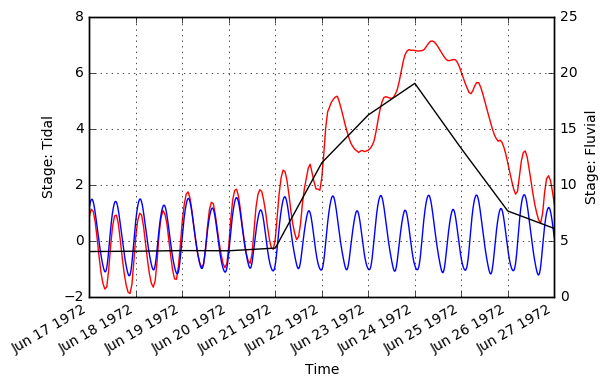

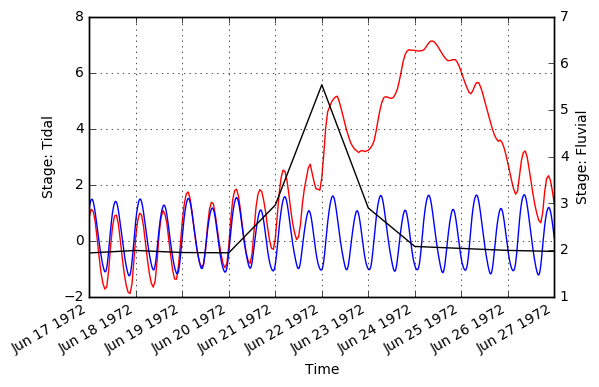

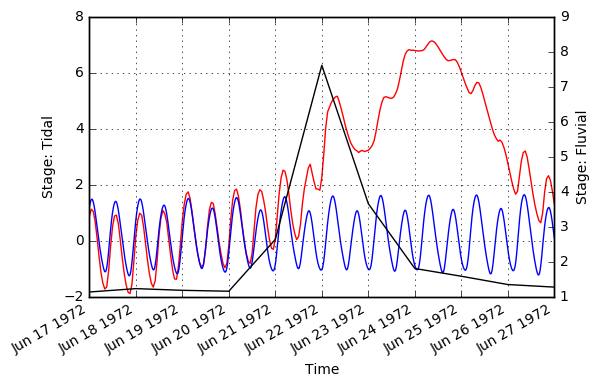

In [11]:
storm_num = 0
plot_idx = df3_idx

#------------------
start_plot, stop_plot = df3['datetime'].ix[df3_idx[storm_num]-5], df3['datetime'].ix[df3_idx[storm_num]+5]
df4 = GetTideObservation(eval(df4_name), start_plot, stop_plot)
df5 = GetTidePrediction(eval(df5_name), start_plot, stop_plot)

print(df1_name)
plot1(df1, df4, df5, Tides_Only)

print(df2_name)
plot2(df2, df4, df5, Tides_Only)

print(df3_name)
plot3(df3, df4, df5, Tides_Only)

We have Observations  8594900
We have Predictions  8594900
LittleFalls
Anacostia_West
Anacostia_East


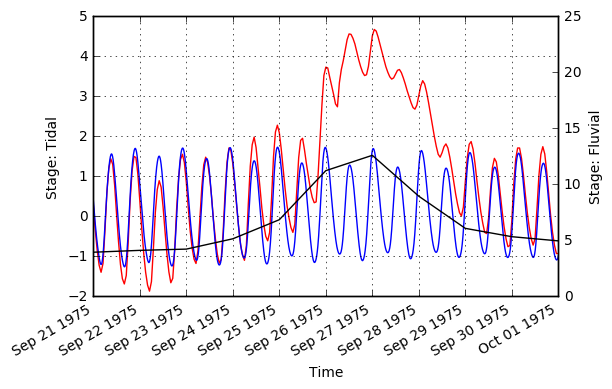

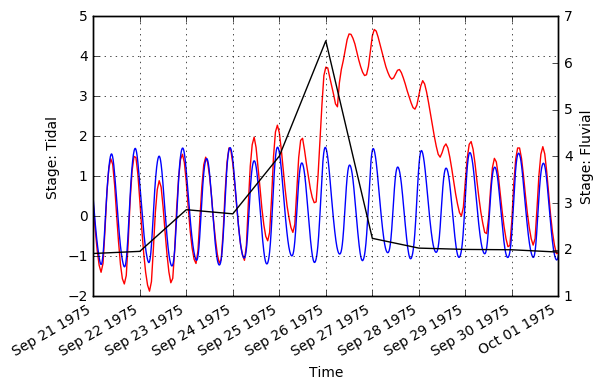

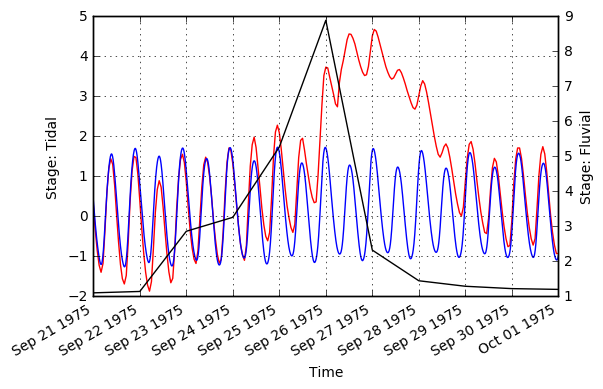

In [12]:
storm_num = 1
plot_idx = df3_idx

#------------------
start_plot, stop_plot = df3['datetime'].ix[df3_idx[storm_num]-5], df3['datetime'].ix[df3_idx[storm_num]+5]
df4 = GetTideObservation(eval(df4_name), start_plot, stop_plot)
df5 = GetTidePrediction(eval(df5_name), start_plot, stop_plot)

print(df1_name)
plot1(df1, df4, df5, Tides_Only)

print(df2_name)
plot2(df2, df4, df5, Tides_Only)

print(df3_name)
plot3(df3, df4, df5, Tides_Only)

We have Observations  8594900
We have Predictions  8594900
LittleFalls
Anacostia_West
Anacostia_East


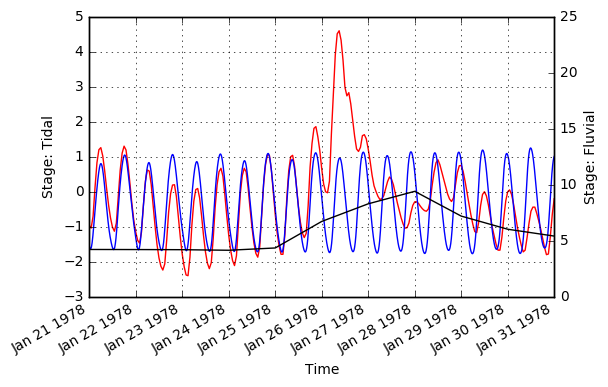

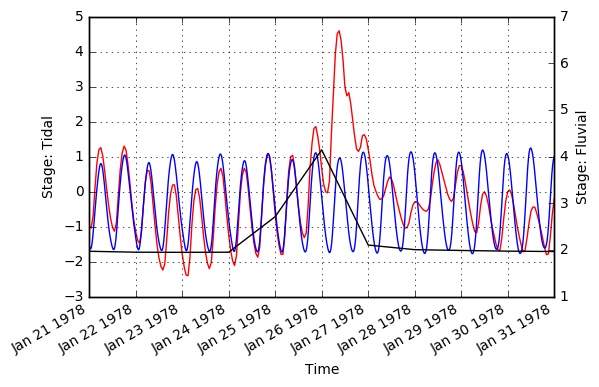

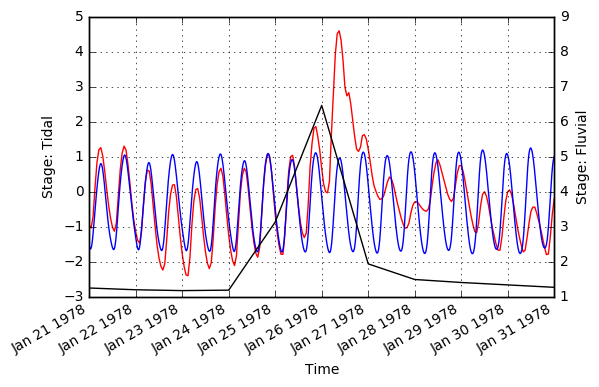

In [13]:
storm_num = 2
plot_idx = df3_idx

#------------------
start_plot, stop_plot = df3['datetime'].ix[df3_idx[storm_num]-5], df3['datetime'].ix[df3_idx[storm_num]+5]
df4 = GetTideObservation(eval(df4_name), start_plot, stop_plot)
df5 = GetTidePrediction(eval(df5_name), start_plot, stop_plot)

print(df1_name)
plot1(df1, df4, df5, Tides_Only)

print(df2_name)
plot2(df2, df4, df5, Tides_Only)

print(df3_name)
plot3(df3, df4, df5, Tides_Only)

We have Observations  8594900
We have Predictions  8594900
LittleFalls
Anacostia_West
Anacostia_East


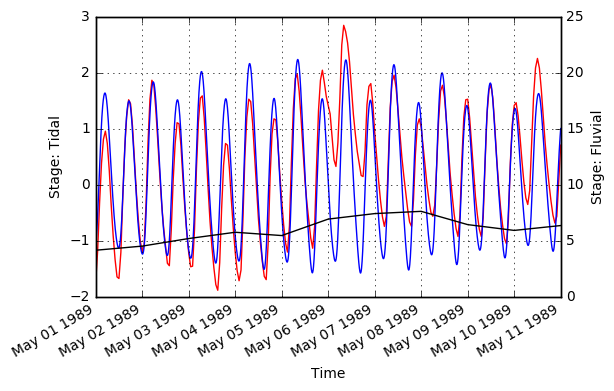

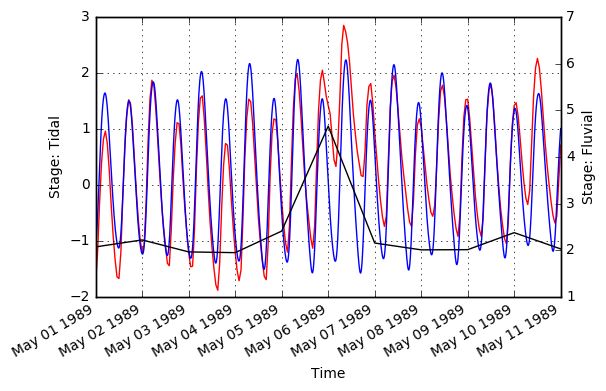

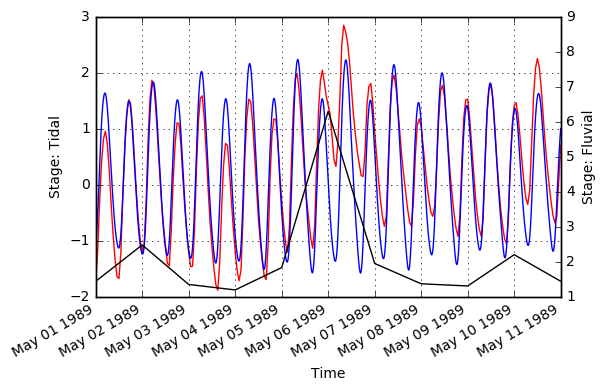

In [14]:
storm_num = 3
plot_idx = df3_idx

#------------------
start_plot, stop_plot = df3['datetime'].ix[df3_idx[storm_num]-5], df3['datetime'].ix[df3_idx[storm_num]+5]
df4 = GetTideObservation(eval(df4_name), start_plot, stop_plot)
df5 = GetTidePrediction(eval(df5_name), start_plot, stop_plot)

print(df1_name)
plot1(df1, df4, df5, Tides_Only)

print(df2_name)
plot2(df2, df4, df5, Tides_Only)

print(df3_name)
plot3(df3, df4, df5, Tides_Only)

We have Observations  8594900
We have Predictions  8594900
LittleFalls
Anacostia_West
Anacostia_East


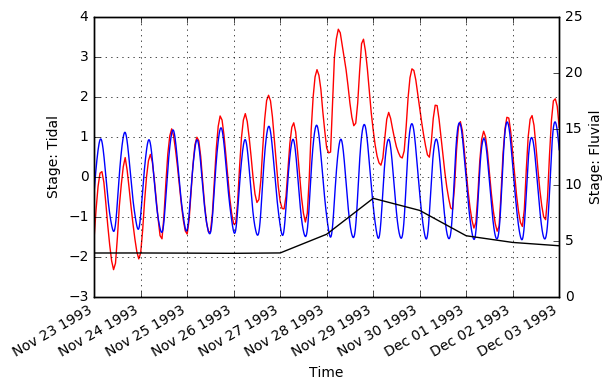

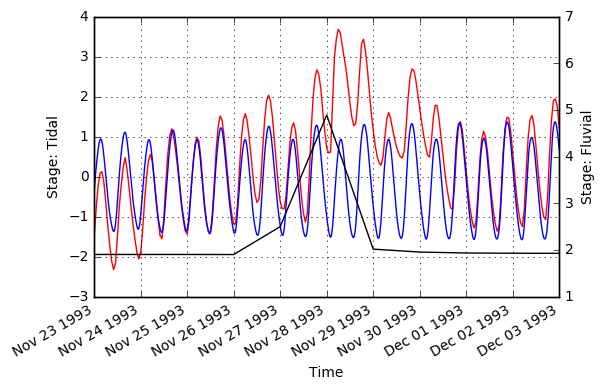

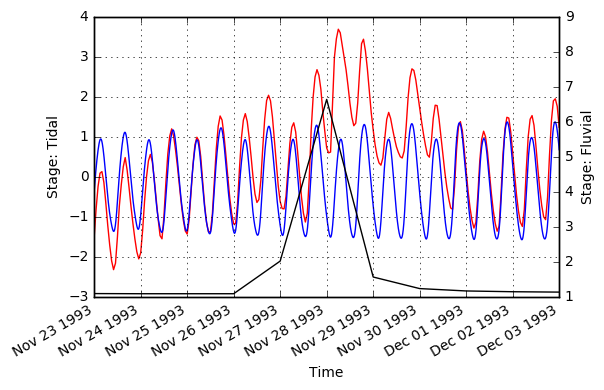

In [15]:
storm_num = 4
plot_idx = df3_idx

#------------------
start_plot, stop_plot = df3['datetime'].ix[df3_idx[storm_num]-5], df3['datetime'].ix[df3_idx[storm_num]+5]
df4 = GetTideObservation(eval(df4_name), start_plot, stop_plot)
df5 = GetTidePrediction(eval(df5_name), start_plot, stop_plot)

print(df1_name)
plot1(df1, df4, df5, Tides_Only)

print(df2_name)
plot2(df2, df4, df5, Tides_Only)

print(df3_name)
plot3(df3, df4, df5, Tides_Only)